California Housing Data Set Description

The below description follows order - Column title - Description - Range* - Datatype

longitude - A measure of how far west a house is; a higher value is farther west	
•	Longitude values range from -180 to +180
•	Data set min: -124.3
•	Data set max: -114.3	
float64

latitude - A measure of how far north a house is; a higher value is farther north	
•	Latitude values range from -90 to +90
•	Data set min: 32.5
•	Data set max: 42.5	
float64

housingMedianAge - Median age of a house within a block; a lower number is a newer building	
•	Data set min: 1.0
•	Data set max: 52.0	
float64

totalRooms - Total number of rooms within a block	
•	Data set min: 2.0
•	Data set max: 37937.0	
float64

totalBedrooms - Total number of bedrooms within a block	
•	Data set min: 1.0
•	Data set max: 6445.0	
float64

population - Total number of people residing within a block	
•	Data set min: 3.0
•	Data set max: 35682.0	
float64

households - Total number of households, a group of people residing within a home unit, for a block	
•	Data set min: 1.0
•	Data set max: 6082.0	
float64

medianIncome - Median income for households within a block of houses (measured in tens of thousands of US Dollars)	
•	Data set min: 0.5
•	Data set max: 15.0	
float64

medianHouseValue - Median house value for households within a block (measured in US Dollars)	
•	Data set min: 14999.0
•	Data set max: 500001.0	
float64

 Reference

Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.

The following is the data methodology described in the paper:

    We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 characteristics.


In [7]:
import pyspark
from pyspark import SparkContext, SparkConf
# Spark Config
conf = SparkConf().setAppName("2_app")
sc = SparkContext(conf=conf)
import pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
#pd.options.display.mpl_style = 'default'

In [8]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
train_data = sqlContext.read.load('california_housing_train.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [19]:
print(train_data.count())
train_data.printSchema()
train_data.dtypes

17000
root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



[('longitude', 'double'),
 ('latitude', 'double'),
 ('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('total_bedrooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double')]

In [20]:
train_data.show(5) 
pd.DataFrame(train_data.take(5), columns=train_data.columns)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [24]:
train_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
longitude,17000,-119.56210823529375,2.0051664084260357,-124.35,-114.31
latitude,17000,35.6252247058827,2.1373397946570867,32.54,41.95
housing_median_age,17000,28.58935294117647,12.586936981660406,1.0,52.0
total_rooms,17000,2643.664411764706,2179.947071452777,2.0,37937.0
total_bedrooms,17000,539.4108235294118,421.4994515798648,1.0,6445.0
population,17000,1429.5739411764705,1147.852959159527,3.0,35682.0
households,17000,501.2219411764706,384.5208408559016,1.0,6082.0
median_income,17000,3.883578100000021,1.9081565183791036,0.4999,15.0001
median_house_value,17000,207300.91235294117,115983.76438720895,14999.0,500001.0


In [29]:
train_data = train_data.na.drop()
train_data.count()

17000

Correlation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


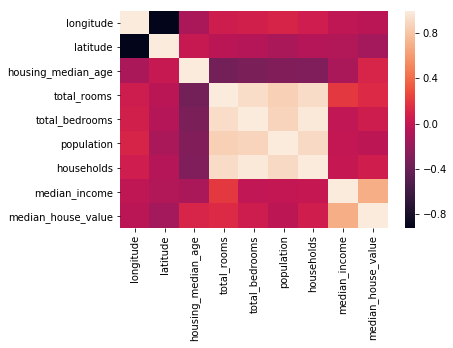

In [55]:
numeric_features = [t[0] for t in train_data.dtypes if t[1] == 'int' or t[1] == 'double']

import seaborn as sns
sampled_data = train_data.select(numeric_features).toPandas()
corr = sampled_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
corr

Since Median_income is highly correlated with median house income compared to other predictor variables, We select median_income as our 1st regressor. Latitude is next in list, we can use latitude as our 2nd regressor. But, using latitude irrespective of longitude doesn't make intutive sense. Hence, We use total_rooms which is thrid in the correlation list as our 2nd predictor variable. We drop other fields from our dataset. Correlation between median_income and total_rooms is 0.19 which shows that these are not highly correlated and hence can be used in our model.

In [9]:
drop_list = ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms','population','households']
train_data = train_data.select([column for column in train_data.columns if column not in drop_list])

In [10]:
train_data.show(5)

+-----------+-------------+------------------+
|total_rooms|median_income|median_house_value|
+-----------+-------------+------------------+
|     5612.0|       1.4936|           66900.0|
|     7650.0|         1.82|           80100.0|
|      720.0|       1.6509|           85700.0|
|     1501.0|       3.1917|           73400.0|
|     1454.0|        1.925|           65500.0|
+-----------+-------------+------------------+
only showing top 5 rows



In [11]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['total_rooms', 'median_income'], outputCol = 'features')
vtrain_data = vectorAssembler.transform(train_data)
vtrain_data = vtrain_data.select(['features', 'median_house_value'])
vtrain_data.show(3)

+---------------+------------------+
|       features|median_house_value|
+---------------+------------------+
|[5612.0,1.4936]|           66900.0|
|  [7650.0,1.82]|           80100.0|
| [720.0,1.6509]|           85700.0|
+---------------+------------------+
only showing top 3 rows



In [12]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = vtrain_data.randomSplit([0.8, 0.2], seed = 100)
print(trainingData.count())
print(testData.count())

13602
3398


In [13]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='median_house_value', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(trainingData)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.2686351085970173,42481.59334199601]
Intercept: 43387.411852766505


In [14]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 83690.965928
r2: 0.481417


In [15]:
lr_predictions = lr_model.transform(testData)
lr_predictions.select("prediction","median_house_value","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="median_house_value",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+------------------+-------------+
|        prediction|median_house_value|     features|
+------------------+------------------+-------------+
| 64619.93083780136|          162500.0|[15.0,0.4999]|
|112415.16560155529|          275000.0| [18.0,1.625]|
|202688.55145329682|          375000.0|  [18.0,3.75]|
| 197377.8150153301|           80000.0| [20.0,3.625]|
|124550.00773849478|          125000.0|[26.0,1.9107]|
+------------------+------------------+-------------+
only showing top 5 rows

R Squared (R2) on test data = 0.467337


In [16]:
test_result = lr_model.evaluate(testData)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 83948.9


In [17]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 9
objectiveHistory: [0.5, 0.4317828162110113, 0.30318938954764113, 0.2701795332494637, 0.2620817327490423, 0.2593056407172949, 0.25929324456848435, 0.259293060951857, 0.2592930609518114]
+-------------------+
|          residuals|
+-------------------+
|  -6780.65876978985|
|-180612.41106117214|
| -3019.037724810478|
| 2879.2632568728513|
|  92169.53448346659|
|  283847.2895478784|
| 242001.78664917088|
| -297688.0677646656|
| -44913.55379090371|
| -76774.74879740071|
|  96349.16999363856|
|-108233.17407591111|
|-27412.479250469303|
| 10143.277993759868|
| -17392.99805203092|
|-126030.75902375267|
|  62589.66983039945|
|-44355.384364143625|
| -99890.84897116217|
| -161686.6569579202|
+-------------------+
only showing top 20 rows



In [18]:
predictions = lr_model.transform(testData)
predictions.select("prediction","median_house_value","features").show()

+------------------+------------------+--------------+
|        prediction|median_house_value|      features|
+------------------+------------------+--------------+
| 64619.93083780136|          162500.0| [15.0,0.4999]|
|112415.16560155529|          275000.0|  [18.0,1.625]|
|202688.55145329682|          375000.0|   [18.0,3.75]|
| 197377.8150153301|           80000.0|  [20.0,3.625]|
|124550.00773849478|          125000.0| [26.0,1.9107]|
|  680607.501088783|          500001.0|[30.0,15.0001]|
|221563.61064295948|          270800.0| [32.0,4.1944]|
| 91168.45895816814|          225000.0|  [40.0,1.125]|
|133650.05230016416|          375000.0|  [40.0,2.125]|
| 268311.1118594144|          350000.0| [45.0,5.2949]|
| 180114.5386518792|          112500.0| [47.0,3.2188]|
|154888.16262007618|          137500.0|  [50.0,2.625]|
| 218609.2094575272|           67500.0|  [55.0,4.125]|
|186747.20854570443|          106300.0|  [58.0,3.375]|
| 228166.2247839333|           67500.0|   [60.0,4.35]|
|138422.78

In [21]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.5, 2.0])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .addGrid(lr.maxIter, [1, 5, 10])
              .build())
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=lr_evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

In [23]:
# Use test set here so we can measure the accuracy of our model on new data

predictions2 = cvModel.transform(testData)
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
lr_evaluator.evaluate(predictions2)

0.4673271662226465

In [24]:
print('Model Intercept: ', cvModel.bestModel.intercept)

Model Intercept:  42823.93480192193
